<a href="https://colab.research.google.com/github/gkv856/KaggleData/blob/main/GKV_Fine_Tune_BERT_for_Text_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [148]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### Install TensorFlow and TensorFlow Model Garden

In [149]:
import tensorflow as tf
print(tf.version.VERSION)

2.6.0


In [150]:
# !pip install -q tensorflow==2.3.0

In [151]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [152]:
# install requirements to use tensorflow/models repository
# !pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [153]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')

In [154]:
!pip install tensorflow_text
!pip install sentencepiece 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import *

--2021-09-17 16:21:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-17 16:21:24 (75.9 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [155]:
!pip install tensorflow_addons

In [156]:
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [157]:
!pip install fsspec

In [158]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.6.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [159]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# DATA_URL = "https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip"
# df = pd.read_csv(DATA_URL, compression="zip", low_memory=False)

DATA_URL = "https://raw.githubusercontent.com/gkv856/KaggleData/main/train.csv"
df = pd.read_csv(DATA_URL, low_memory=False)

In [160]:
df.tail(20)

,id,keyword,location,text,target
7593,10848,NaN,NaN,I just heard a really loud bang and everyone i...,0
7594,10849,NaN,NaN,A gas thing just exploded and I heard screams ...,1
7595,10850,NaN,NaN,NWS: Flash Flood Warning Continued for Shelby ...,1
7596,10851,NaN,NaN,RT @LivingSafely: #NWS issues Severe #Thunders...,1
7597,10852,NaN,NaN,#??? #?? #??? #??? MH370: Aircraft debris foun...,1
7598,10853,NaN,NaN,Father-of-three Lost Control of Car After Over...,1
7599,10854,NaN,NaN,1.3 #Earthquake in 9Km Ssw Of Anza California ...,1
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt:...,1
7601,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been ...,1
7602,10860,NaN,NaN,a siren just went off and it wasn't the Forney...,1


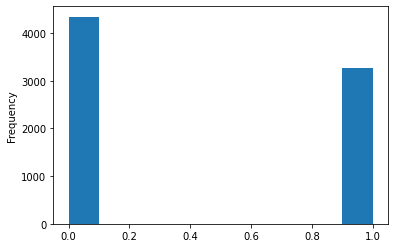

In [161]:
# our data is imbalanced and we will assume that in the real world/test data, 
# this will continued to be the case 
df["target"].plot(kind="hist")

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [162]:
# later you can use the whole data for traiing and test
train_df, valid_df = train_test_split(df, 
                                       random_state=42, 
                                      #  train_size=0.9, 
                                       test_size=.3,
                                       stratify=df["target"].values)

# use the below structure for testing if the data is huge
# train_df, remaining = train_test_split(df, 
#                                        random_state=42, 
#                                        train_size=0.0095, 
#                                        stratify=df["target"].values)

# valid_df, _ = train_test_split(remaining, 
#                               random_state=42, 
#                               train_size=0.0095, 
#                               stratify=remaining["target"].values)
len(train_df), len(valid_df)

(72, 71)

In [163]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df["text"].values,
                                                   train_df["target"].values))
  
  test_data = tf.data.Dataset.from_tensor_slices((valid_df["text"].values,
                                                   valid_df["target"].values))
train_data, test_data  

(<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 <TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>)

In [164]:
for text, label in train_data.take(1):
  print(text)
  print(label)

tf.Tensor(b"I had school today and I've already had a panic attack. Thank you high school for sucking !!!", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [165]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

# Label categories, right now our data has these categories
label_list = [0, 1]

# maximum length of (token) input sequences, or the words in a question
# to save speed we should reset this
max_seq_length = 64

train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2

bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)


vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [166]:
# This provides a function to convert row to input features and label
from bs4 import BeautifulSoup
import re
def get_clean_text(text_str):
  text_str = BeautifulSoup(text_str, "lxml").get_text()
  text_str = re.sub(r"@[A-Za-z0-9]+", " ", text_str)
  text_str = re.sub(r"https?://[[A-Za-z0-9./]+", " ", text_str)
  text_str = re.sub(r"[^a-zA-Z.!?']", " ", text_str)
  text_str = re.sub(r" +", " ", text_str)
  # text_str = text_str.lower()
  # text_str = replace_typical_misspell(text_str)

  return text_str

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  # guid is unique id for each example, we dont need textb as per our usecase
  clean_text = text.numpy()#get_clean_text(text.numpy())
  example = classifier_data_lib.InputExample(guid=None, text_a=clean_text, label=label.numpy())
  
  feature = classifier_data_lib.convert_single_example(0, 
                                                       example, 
                                                       label_list, 
                                                       max_seq_length, 
                                                       tokenizer)
  # print(feature)
  # input_ids,
  #              input_mask,
  #              segment_ids,
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)
  

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [167]:
def to_feature_map(text, label):
  out = tf.py_function(to_feature, inp=[text, label], 
                       Tout=[tf.int32, tf.int32, tf.int32, tf.int32,])
  iids, imask, segids, label = out[0], out[1], out[2], out[3]

  iids.set_shape([max_seq_length])
  imask.set_shape([max_seq_length])
  segids.set_shape([max_seq_length])
  label.set_shape([])

  x = {
      "input_word_ids": iids,
       "input_mask": imask,
       "input_type_ids": segids
  }
  # x = text
  return (x, label)



## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [168]:
s = train_data.take(1)
for t, l in s:
  print(to_feature_map(t, l))

({'input_word_ids': <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([  101,  1045,  2018,  2082,  2651,  1998,  1045,  1005,  2310,
        2525,  2018,  1037,  6634,  2886,  1012,  4067,  2017,  2152,
        2082,  2005, 13475,   999,   999,   999,   102,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,    

In [169]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data
                .map(to_feature_map, num_parallel_calls=tf.data.AUTOTUNE)
                .shuffle(1000)
                .batch(train_batch_size, drop_remainder=True)
                .prefetch(tf.data.AUTOTUNE))

  # valid
  
  test_data = (test_data
                .map(to_feature_map, num_parallel_calls=tf.data.AUTOTUNE)
                # .shuffle(1000) we dont need to shuffle the test data, just need them for predictions
                .batch(train_batch_size, drop_remainder=True)
                .prefetch(tf.data.AUTOTUNE))

  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [170]:
# train data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [171]:
# valid data spec


## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [172]:
from tensorflow.keras import layers
# Train model
from datetime import datetime
from tensorflow.keras import callbacks

In [173]:
# Building the model
def create_model(drop_rate=0.4, m_name="model"):
  input_word_ids = layers.Input(shape=(max_seq_length, ),
                             dtype=tf.int32,
                             name="input_word_ids")
  input_mask = layers.Input(shape=(max_seq_length, ),
                             dtype=tf.int32,
                             name="input_mask")
  segment_ids = layers.Input(shape=(max_seq_length, ),
                             dtype=tf.int32,
                             name="segment_ids")
  # pooled output is vector representation of the whole sentence
  # sequesnced output is vector representation of each word
  pooled_out, sequenced_out = bert_layer([input_word_ids, input_mask, segment_ids],)


  # x = layers.Dense(512, activation = 'relu')(pooled_out)
  # x = layers.Dropout(0.3)(x)
  # x = layers.Dense(256, activation = 'relu')(x)
  # x = layers.Dropout(0.2)(x)
  x = layers.Dense(64, activation = 'relu')(pooled_out)

  dropout = layers.Dropout(drop_rate)(x)
  outputs = layers.Dense(1, activation="sigmoid", name="outputs")(dropout)

  model = tf.keras.Model(
      #mapping the input dict values here
      inputs = {
            'input_word_ids': input_word_ids,
            'input_mask': input_mask,
            'input_type_ids': segment_ids,
      }, 
      outputs=outputs, name=m_name)
  
  return model


In [ ]:
def compile_model(model, lr=2e-5):
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

  model_fig = tf.keras.utils.plot_model(model, show_shapes=True, dpi=72)
  return model, model_fig

In [ ]:
model = create_model(m_name="model0")
# model.summary()

In [ ]:
model, _ = compile_model(model, 1e-5)

In [ ]:
now = datetime.now()
curr_time = now.strftime("%Y%m%d_%H%M%S")
filepath = "/content/drive/MyDrive/AI_ML_DL/Kaggle/01. Disaster tweet/dense" + curr_time  
chk_pt = callbacks.ModelCheckpoint(filepath=filepath,
                                    save_weights_only=True,
                                    verbose=0)

EPOCHS = 3
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=EPOCHS,
                    callbacks=[chk_pt])

## Task 10: Fine-Tune BERT for Text Classification

## Task 11: Evaluate the BERT Text Classification Model

In [183]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [184]:
plot_graphs(history, "accuracy")
y_pred = model.predict(test_data)
calculate_results(valid_df["target"], y_pred)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:

TEST_URL = "https://raw.githubusercontent.com/gkv856/KaggleData/main/test.csv"
df_test = pd.read_csv(TEST_URL)
df_test.head()

In [185]:
# num = 5
# test_sample = df_test["text"].head(num)
# ids = df_test['id'].head(num)
# test_sample

num = 5
test_sample = df_test["text"]#.head(num)
ids = df_test['id']#.head(num)
test_sample

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

In [186]:
real_test_data = tf.data.Dataset.from_tensor_slices((test_sample, [0]*len(test_sample)))
real_test_data = (real_test_data.map(to_feature_map).batch(train_batch_size)
                  .prefetch(tf.data.AUTOTUNE))

y_preds = model.predict(real_test_data) 
y_preds = tf.round(y_preds)
y_preds = tf.cast(y_preds, dtype=tf.int32)

res = tf.squeeze(y_preds).numpy()
my_sub = pd.DataFrame({'id': ids,'target':res})

my_sub.head(20)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [68]:
my_sub.to_csv("sub.csv", index=False)

In [192]:
model3 = create_model(m_name="model3")

In [193]:
model3, _ = compile_model(model3, lr=0.1)
model3.load_weights(filepath)